In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('stat_df_midl.csv') as f:
    df = pd.read_csv(f)

In [3]:
df = df[['alpha', 'seed', 'worst_usw_tpms', 'worst_usw_maxmin', 'true_usw_tpms', 'true_usw_maxmin']]

In [4]:
df

,alpha,seed,worst_usw_tpms,worst_usw_maxmin,true_usw_tpms,true_usw_maxmin
0,0.0,0,1.586974,92.715745,18.609193,93.540157
1,0.0,1,0.658581,94.761478,18.294932,94.761478
2,0.0,2,0.524149,92.932174,19.257588,93.110576
3,0.0,3,2.527893,92.154915,22.150156,93.496798
4,0.0,4,0.953254,94.282711,15.230651,94.282711
...,...,...,...,...,...,...
105,1.0,5,100.000000,98.182197,100.000000,99.679190
106,1.0,6,100.000000,98.290667,100.000000,99.394380
107,1.0,7,100.000000,97.716853,100.000000,99.356497
108,1.0,8,100.000000,97.410729,100.000000,99.183047


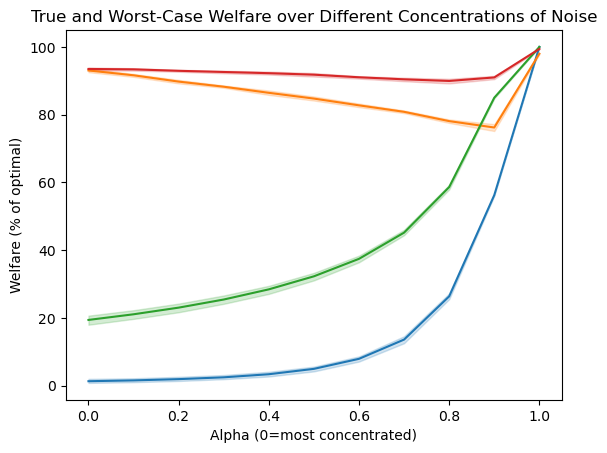

In [5]:
sns.lineplot(data=df[['alpha', 'seed', 'worst_usw_tpms']], x='alpha', y='worst_usw_tpms', legend="auto")
sns.lineplot(data=df[['alpha', 'seed', 'worst_usw_maxmin']], x='alpha', y='worst_usw_maxmin')
sns.lineplot(data=df[['alpha', 'seed', 'true_usw_tpms']], x='alpha', y='true_usw_tpms')
sns.lineplot(data=df[['alpha', 'seed', 'true_usw_maxmin']], x='alpha', y='true_usw_maxmin')

plt.title("True and Worst-Case Welfare over Different Concentrations of Noise")
plt.xlabel("Alpha (0=most concentrated)")
plt.ylabel("Welfare (% of optimal)")
plt.savefig("WelfareVaryingAlpha.png")

In [27]:
with open('stat_df_midl_dummy_revs.csv') as f:
    df = pd.read_csv(f)
df.shape

(152, 4)

In [32]:
df = df[['num_dummies', 'seed', 'true_usw_tpms', 'true_usw_maxmin']]
df.shape

(142, 4)

In [31]:
# The birkhoff von neumann C code sometimes fails due to a "stack smashing detected" error, and then we end up with 0 welfare because the allocation is empty. Let's ignore for now and just plot the values when this doesn't occur.

df = df[df['true_usw_maxmin']>0]

In [30]:
df

,num_dummies,seed,true_usw_tpms,true_usw_maxmin
0,0,0,100.000000,99.340330
1,0,1,100.000000,99.713425
2,0,2,100.000000,99.579335
4,0,5,100.000000,99.657567
5,0,6,100.000000,99.284495
...,...,...,...,...
147,100,4,48.214945,94.859857
148,100,5,47.529976,95.042161
149,100,6,47.830264,94.019035
150,100,7,49.647204,94.688092


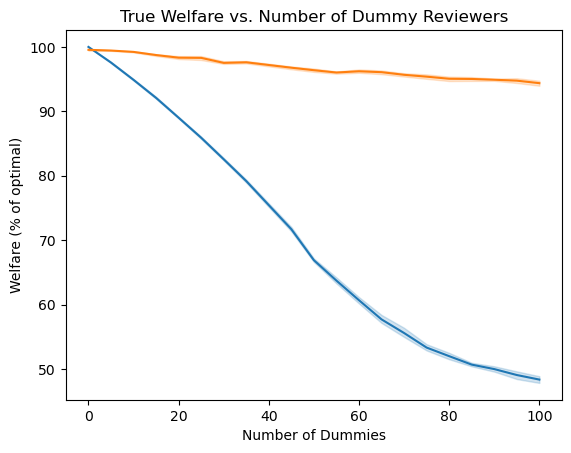

In [23]:
sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_tpms']], x='num_dummies', y='true_usw_tpms', legend='auto')
sns.lineplot(data=df[['num_dummies', 'seed', 'true_usw_maxmin']], x='num_dummies', y='true_usw_maxmin')

plt.title("True Welfare vs. Number of Dummy Reviewers")
plt.xlabel("Number of Dummies")
plt.ylabel("Welfare (% of optimal)")
plt.savefig("WelfareVaryingDummies.png")